In [1]:
#@title imports

import os
import kagglehub
import json
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [2]:
#@title Download from Kaggle
path = "/root/.cache/kagglehub/datasets/himanshuwagh/spotify-million/versions/1"
if not os.path.exists(path):
  path = kagglehub.dataset_download("himanshuwagh/spotify-million")

100%|██████████| 5.20G/5.20G [04:09<00:00, 22.3MB/s]


Extracting files...


# Esplorazione dataset

In [3]:
# README
with open(os.path.join(path, "README.md"), "r") as f:
    print(f.read())

# The Million Playlist Dataset
(Documentation updated Aug 5, 2020)

The Million Playlist Dataset contains 1,000,000 playlists created by
users on the Spotify platform.  It can be used by researchers interested
in exploring how to improve the music listening experience.

## What's in the Million Playlist Dataset (MPD)
The MPD contains a million user-generated playlists. These playlists
were created during the period of January 2010 through October 2017.
Each playlist in the MPD contains a playlist title, the track list
(including track metadata) editing information (last edit time, 
number of playlist edits) and other miscellaneous information 
about the playlist. See the **Detailed
Description** section for more details.

## License
Usage of the Million Playlist Dataset is subject to these 
[license terms](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge/challenge_rules)

## Citing the Million Playlist Dataset
To use this dataset, please cite the following 

In [4]:
path, type(path), os.listdir(path)

('/root/.cache/kagglehub/datasets/himanshuwagh/spotify-million/versions/1',
 str,
 ['README.md', 'license.txt', 'md5sums', 'src', 'stats.txt', 'data'])

In [5]:
type(os.listdir(os.path.join(path, "data")))

list

In [6]:
# data contiene 1000 slice di 1000 playlist ciascuno
mille_playlist = os.listdir(os.path.join(path, "data"))[0] # prendo il file di una una slice
type(mille_playlist), mille_playlist

(str, 'mpd.slice.195000-195999.json')

In [7]:
a_slice = os.path.join(path, "data", mille_playlist)
type(a_slice), a_slice


(str,
 '/root/.cache/kagglehub/datasets/himanshuwagh/spotify-million/versions/1/data/mpd.slice.195000-195999.json')

In [8]:
with open(a_slice, "r") as f:
    a_slice_file = json.load(f)

type(a_slice_file), len(a_slice_file)

(dict, 2)

In [9]:
a_slice_file.keys()

dict_keys(['info', 'playlists'])

In [10]:
a_slice_file['info'], type(a_slice_file['info'])

({'generated_on': '2017-12-03 08:41:42.057563',
  'slice': '195000-195999',
  'version': 'v1'},
 dict)

In [11]:
type(a_slice_file['playlists']), len(a_slice_file['playlists'])

(list, 1000)

In [12]:
print(type(a_slice_file['playlists'][0]))
print('--------------------------------')
print(len(a_slice_file['playlists'][0]))
print('--------------------------------')
print(a_slice_file['playlists'][0])
print('--------------------------------')
print(a_slice_file['playlists'][0].keys())
print('--------------------------------')
print(type(a_slice_file['playlists'][0]['tracks']))
print('--------------------------------')
print(type(a_slice_file['playlists'][0]['tracks'][0]))
print('--------------------------------')
print(a_slice_file['playlists'][0]['tracks'][0]) # una canzone della prima playlist della prima slice

<class 'dict'>
--------------------------------
11
--------------------------------
{'name': 'abby', 'collaborative': 'false', 'pid': 195000, 'modified_at': 1441411200, 'num_tracks': 247, 'num_albums': 149, 'num_followers': 1, 'tracks': [{'pos': 0, 'artist_name': 'Meghan Trainor', 'track_uri': 'spotify:track:2e1N4FhuB08W4iKmYpEftE', 'artist_uri': 'spotify:artist:6JL8zeS1NmiOftqZTRgdTz', 'track_name': 'Close Your Eyes', 'album_uri': 'spotify:album:5W98Ab4VvQEuFEE4TIe5fE', 'duration_ms': 220266, 'album_name': 'Title'}, {'pos': 1, 'artist_name': 'Meghan Trainor', 'track_uri': 'spotify:track:3cU2wBxuV6nFiuf6PJZNlC', 'artist_uri': 'spotify:artist:6JL8zeS1NmiOftqZTRgdTz', 'track_name': 'Dear Future Husband', 'album_uri': 'spotify:album:5W98Ab4VvQEuFEE4TIe5fE', 'duration_ms': 184226, 'album_name': 'Title'}, {'pos': 2, 'artist_name': 'Meghan Trainor', 'track_uri': 'spotify:track:0k5hoseEJnCAbpRh38dNoI', 'artist_uri': 'spotify:artist:6JL8zeS1NmiOftqZTRgdTz', 'track_name': 'Title', 'album_uri': 

In [13]:
for key,value in a_slice_file['playlists'][0].items():
    print(f'{key} : {type(value)}')

name : <class 'str'>
collaborative : <class 'str'>
pid : <class 'int'>
modified_at : <class 'int'>
num_tracks : <class 'int'>
num_albums : <class 'int'>
num_followers : <class 'int'>
tracks : <class 'list'>
num_edits : <class 'int'>
duration_ms : <class 'int'>
num_artists : <class 'int'>


In [14]:
for key,value in a_slice_file['playlists'][0]['tracks'][1].items():
    print(f'{key} : {type(value)}')

pos : <class 'int'>
artist_name : <class 'str'>
track_uri : <class 'str'>
artist_uri : <class 'str'>
track_name : <class 'str'>
album_uri : <class 'str'>
duration_ms : <class 'int'>
album_name : <class 'str'>


Quindi abbiamo un dataset con tanti file. In particolare, il file 'data' è una lista di file .json. Ciascuno di questo file contiene informazioni riguardo 1000 playlist (quindi abbiamo 1000 file .json). Ciascuno di questi files .json contiene un dizionario a due chiavi: info e playlists. il valore della chiave 'info' è a sua volta un dizionario con informazioni riguardo le 1000 playlist. Il valore della chiave 'playlist' è una lista di lunghezza 1000. Ciascun elemento della lista è una delle mille playlist. Ciascun elemento della lista (ciascuna playlist) è un dizionario che ha come chiavi diverse informazioni inerenti la playlist. Nello specifico le chiavi di ciascuno di questi dizionari sono:
- name : <class 'str'>
- collaborative : <class 'str'>
- pid : <class 'int'>
- modified_at : <class 'int'>
- num_tracks : <class 'int'>
- num_albums : <class 'int'>
- num_followers : <class 'int'>
- tracks : <class 'list'>
- num_edits : <class 'int'>
- duration_ms : <class 'int'>
- num_artists : <class 'int'>

In particolare il valore della chiave 'tracks' è una lista. Questa lista è una lista di dizionari. La lunghezza della lista è pari al numero di tracce nella playlist, e ciascun elemento della lista è un dizionario. Questo dizionario ha le seguenti chiavi (riferite quindi alla singola canzone):

- pos : <class 'int'> indica la posizione della canzone nella playlist
- artist_name : <class 'str'>
- track_uri : <class 'str'>
- artist_uri : <class 'str'>
- track_name : <class 'str'>
- album_uri : <class 'str'>
- duration_ms : <class 'int'>
- album_name : <class 'str'>


## playlist di lunghezza minima e massima


In [15]:
"""
a_slice = None
mille_playlist = None
a_slice_file = None

max_length = 0
min_length = 0

for i in range(1000):
  mille_playlist = os.listdir(os.path.join(path, "data"))[i] # prendo il file di una una slice
  a_slice = os.path.join(path, "data", mille_playlist) # path di una slice
  with open(a_slice, "r") as f:
    a_slice_file = json.load(f)
    for i in range(1000):
      if len(a_slice_file['playlists'][i]['tracks']) > max_length:
        max_length = len(a_slice_file['playlists'][i]['tracks'])
      if len(a_slice_file['playlists'][i]['tracks']) < min_length:
        min_length = len(a_slice_file['playlists'][i]['tracks'])

"""
pass

In [16]:
# max_length, min_length
pass

# Languange model

Pensiamo adesso alla generazione di playlists (continuazione in realtà) come un language model basato sul single character. Cioè ogni playlist è una parola, ogni canzone è un carattere. Il testo è l'insieme di tutte le nostre playlist.

La differenza con il progetto di Karpathy è che lui dato in input un file di testo contenete per ogni riga una parola (che nel nostro caso è una playlist) genera parole simili (quindi genererebbe playlist simili da zero). Quello che noi dovremmo modificare è che noi vogliamo che la nuova playlist generata sia come la playlist che abbiamo da continuare con uno/due caratteri in più. Vedere le metriche di valutazione date da Silvestri

In [316]:
#@title params per i dati scelti

num_playlist = 1000        # playlist per slice che prendiamo
num_slices = 1

In [317]:
# vogliamo ora leggere tutte le playlist (del sottoinsieme scelto)

playlists = list()

for i in range(num_slices):
  mille_playlist = os.listdir(os.path.join(path, "data"))[i] # prendo il file di una una slice
  a_slice = os.path.join(path, "data", mille_playlist) # path di una slice
  with open(a_slice, "r") as f:
    a_slice_file = json.load(f)
    for j in range(num_playlist):
      playlists.append(a_slice_file['playlists'][j])

In [318]:
len(playlists), len(playlists[6]['tracks']), playlists[6]

(1000,
 132,
 {'name': 'car jams ',
  'collaborative': 'false',
  'pid': 195006,
  'modified_at': 1483747200,
  'num_tracks': 132,
  'num_albums': 121,
  'num_followers': 1,
  'tracks': [{'pos': 0,
    'artist_name': 'Lynyrd Skynyrd',
    'track_uri': 'spotify:track:4CJVkjo5WpmUAKp3R44LNb',
    'artist_uri': 'spotify:artist:4MVyzYMgTwdP7Z49wAZHx0',
    'track_name': 'Sweet Home Alabama',
    'album_uri': 'spotify:album:5rtOJsiDDjA9V5306cyTRS',
    'duration_ms': 281147,
    'album_name': 'Second Helping'},
   {'pos': 1,
    'artist_name': 'Lynyrd Skynyrd',
    'track_uri': 'spotify:track:4CJVkjo5WpmUAKp3R44LNb',
    'artist_uri': 'spotify:artist:4MVyzYMgTwdP7Z49wAZHx0',
    'track_name': 'Sweet Home Alabama',
    'album_uri': 'spotify:album:5rtOJsiDDjA9V5306cyTRS',
    'duration_ms': 281147,
    'album_name': 'Second Helping'},
   {'pos': 2,
    'artist_name': 'Queen',
    'track_uri': 'spotify:track:1AhDOtG9vPSOmsWgNW0BEY',
    'artist_uri': 'spotify:artist:1dfeR4HaWDbWqFHLkxsg1d',
  

In [319]:
playlists_chosen_features = [list() for _ in range(len(playlists))]

# per ora prendiamo solo track_name come informazione sulla playlist
for i in range(len(playlists)):
  for j in range(len(playlists[i]['tracks'])):
    playlists_chosen_features[i].append(playlists[i]['tracks'][j]['track_name'])

len(playlists_chosen_features), playlists_chosen_features[0], type(playlists_chosen_features[0])

(1000,
 ['Close Your Eyes',
  'Dear Future Husband',
  'Title',
  'Dear No One',
  'Thinking Out Loud',
  'I See Fire',
  'Lego House',
  'Give Me Love',
  'Not Tonight',
  'Porn Star',
  "Kissin' On My Tattoos",
  'Suitcase',
  'Daddy',
  'Mountains',
  'River',
  'Wonder',
  'Ride',
  'Forever',
  'The Wire',
  'Gravity',
  'King of Anything',
  'Love Song',
  'Maps',
  'It Was You',
  'Tuesday',
  "Hold On, We're Going Home",
  'Make You Feel My Love',
  'Turning Tables',
  'Hometown Glory [Single Version]',
  'Mr. President',
  'Take It All',
  'On My Mind',
  'No Matter Where You Are',
  'XO',
  "Schoolin' Life",
  'End of Time',
  '1+1',
  'Break Free',
  'V. 3005',
  'Heartbeat',
  'Not a Bad Thing',
  'Suit & Tie',
  'Tunnel Vision',
  'That Girl',
  'Let the Groove Get In',
  'Blue Ocean Floor',
  'Hold Tight',
  'Do What U Want',
  'Rather Be (feat. Jess Glynne)',
  'Rich (feat. August Alsina)',
  'Seeya',
  'Pretty Wings - uncut',
  "This Woman's Work - Uncut",
  'Fistful of

In [320]:
playlists = playlists_chosen_features

In [321]:
# facciamo un vocabolario che mappa ogni carattere del LM (quindi ogni canzone tra quelle selezionate) to/from interi

chars = list(set(playlists[i][j] for i in range(len(playlists)) for j in range(len(playlists[i])))) # canzoni uniche
print(chars), print(len(chars))
# capire se da qui sopra levare track_name (se vogliamo avere più informazioni sulla canzone)
stoi = {s:i+1 for i,s in enumerate(chars)} # mappa stringa a intero
stoi['.'] = 0                              # stop/start token
itos = {i:s for s,i in stoi.items()}       # mappa intero a stringa
print(itos), print(itos[0])
pass

["It's A Vibe", "I Can't Drive 55", 'Tree to Grow', "#LongLiveSteelo (feat. T'nah Apex)", 'Fire We Make', 'Get Ur Freak On', 'Razor to Oblivion', 'All the Pretty Girls', 'Can I Take U Home - Main', 'Give It To Me', 'Santa Tell Me', 'Drunk Enough to Say That I Love You', 'ICE', 'Predador de Perereca', 'Indica La Roux', 'El baile y el salón', 'The Girl (feat. Cozi Zuehlsdorff)', "Diggin' In The Cold Ground", 'Die Trying', 'Oh My God', 'Just You - Original Mix', '2 On', 'ocean eyes', 'So Here We Are', '(sic)', 'I’m A Man of Constant Sorrow - The Voice Performance', "She's a Lady", 'Swing Tree', 'Mr. Turtles Cloud Kingdom', 'Chè guevara', 'Almost Had Me', 'Funky Cold Medina', 'Candle In The Wind', 'Que Alguien Me Diga', 'Lone Digger', 'Teeth', 'No Police', 'Gorilla', "Ain't Worried About Nothin", 'FeelGood (Pierce Fulton Radio Edit) [feat. Pierce Fulton]', 'Relentless Pursuit', 'It Is Well - Live', 'Hour Glass', 'I Will Wait', 'A Ver A Qué Horas - En Vivo', 'A Little More Summertime', 'Unt

In [322]:
print(type(itos[0]))

<class 'str'>


In [323]:
len(itos)

31094

In [324]:
#@title parametri dataset

block_size = 10 # context length : how many songs do we take to predict the next one song?

In [325]:
def build_dataset(playlists):
  X, Y = [], []

  for playlist in playlists:
    context = [0] * block_size
    for song_name in playlist + ['.']:
      index = stoi[song_name]
      X.append(context)
      Y.append(index)
      context = context[1:] + [index] # crop and append

  X = torch.tensor(X, device=device)
  Y = torch.tensor(Y, device=device)
  print(X.shape, Y.shape)
  return X, Y

In [326]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [327]:
# train, valid/dev, test

random.seed(42)
random.shuffle(playlists)
n1 = int(0.8*len(playlists))
n2 = int(0.9*len(playlists))

Xtr, Ytr = build_dataset(playlists[:n1])
Xdev, Ydev = build_dataset(playlists[n1:n2])
Xte, Yte = build_dataset(playlists[n2:])

Xtr # shape: (somma delle lunghezze di tutte le playlist in playlists +  block_size, context_size)

torch.Size([54475, 10]) torch.Size([54475])
torch.Size([7060, 10]) torch.Size([7060])
torch.Size([6825, 10]) torch.Size([6825])


tensor([[    0,     0,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0, 22306],
        [    0,     0,     0,  ...,     0, 22306, 15590],
        ...,
        [16466, 24750, 17905,  ..., 12561, 30202,  6668],
        [24750, 17905, 13317,  ..., 30202,  6668, 18713],
        [17905, 13317,   660,  ...,  6668, 18713,  4883]], device='cuda:0')

In [328]:
Ytr #labels

tensor([22306, 15590,   573,  ..., 18713,  4883,     0], device='cuda:0')

## model

We have tutte le possibili canzoni e le embeddiamo in uno spazio più basso dimensionale.

In [329]:
# parametri modello

g = torch.Generator(device=device).manual_seed(2147483647)
embedded_dims = 15
num_neurons = 1024   # hidden layer

In [330]:
C = torch.randn((len(itos), embedded_dims), generator=g, device=device)
W1 = torch.randn((block_size * embedded_dims, num_neurons), generator=g, device=device)
b1 = torch.randn(num_neurons, generator=g, device=device)
W2 = torch.randn((num_neurons, len(itos)), generator=g, device=device)
b2 = torch.randn(len(itos), generator=g, device=device)

In [331]:
params = [C, W1, b1, W2, b2]
sum(p.nelement() for p in params) # number of parameters in total

32492384

In [332]:
C, C.shape

(tensor([[-0.8277, -0.6333, -0.7997,  ...,  0.4402,  0.5584, -0.1711],
         [ 0.2831,  0.4658, -0.8277,  ...,  1.9366,  0.4318, -1.4346],
         [ 0.5459,  0.2988,  0.4491,  ...,  0.2572,  0.0397,  0.1097],
         ...,
         [ 0.9558,  0.8826,  1.1800,  ...,  0.9473,  0.6642,  1.1049],
         [-0.5863, -2.2366, -1.3676,  ...,  0.0117, -0.5558,  0.4957],
         [-0.8631, -0.9152, -1.2484,  ...,  0.3542, -1.6568,  0.7125]],
        device='cuda:0'),
 torch.Size([31094, 15]))

In [333]:
for p in params:
  p.requires_grad = True

In [334]:
lossi = []
log_lossi = []

In [335]:
# Funzione per controllare e spostare i tensori sul device corretto
def check_and_move(tensor, device):
    if tensor.device != device:
        print(f"Moving tensor from {tensor.device} to {device}")
        return tensor.to(device)
    return tensor

# Assicurati che Xtr, Ytr e i parametri siano sul device corretto
Xtr = check_and_move(Xtr, device)
Ytr = check_and_move(Ytr, device)
params = [C, W1, b1, W2, b2]
params = [check_and_move(p, device) for p in params]

Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda


In [336]:
#@title training

for _ in range(30000):

  # better to have an approx gradient and perform more steps
  minibatch_portion = 1000

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (minibatch_portion,))

  # forward pass
  emb = C[Xtr[ix]] # per ogni elemento di X ci dà l'embedding causale iniziale lungo embedded_dims
  h = torch.tanh(emb.view(-1, block_size * embedded_dims) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in params:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in params:
    p.data += -lr * p.grad

  # track stats
  lossi.append(loss.item())
  log_lossi.append(loss.log10().item())
  print(loss.item())

Streaming output truncated to the last 5000 lines.
14.03821849822998
13.726972579956055
14.126709938049316
13.56320571899414
13.758100509643555
13.615602493286133
13.074078559875488
14.385815620422363
12.864070892333984
14.440754890441895
12.475505828857422
14.034818649291992
13.961668014526367
12.930356979370117
13.349916458129883
14.086175918579102
14.811134338378906
13.208791732788086
13.976688385009766
14.012073516845703
13.079670906066895
12.810880661010742
12.820069313049316
13.624920845031738
13.460433959960938
14.380813598632812
13.93656063079834
13.919114112854004
13.961426734924316
13.857443809509277
13.846235275268555
13.879748344421387
13.558088302612305
13.246851921081543
13.98775577545166
13.719318389892578
13.991374015808105
13.05642318725586
13.509177207946777
13.498867988586426
12.737618446350098
13.39001750946045
14.325257301330566
14.818839073181152
14.111184120178223
14.772613525390625
14.028715133666992
14.59766674041748
13.551551818847656
13.210121154785156
13.611

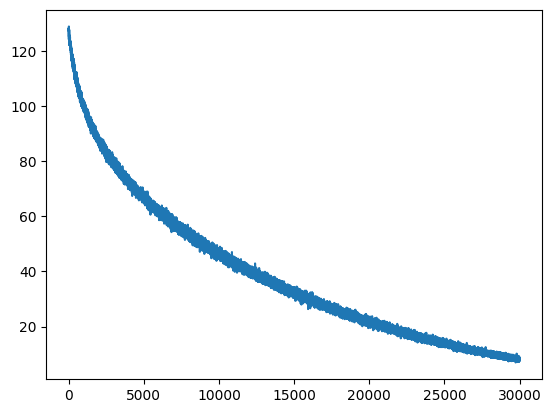

In [337]:
plt.plot(torch.arange(len(lossi)), lossi)

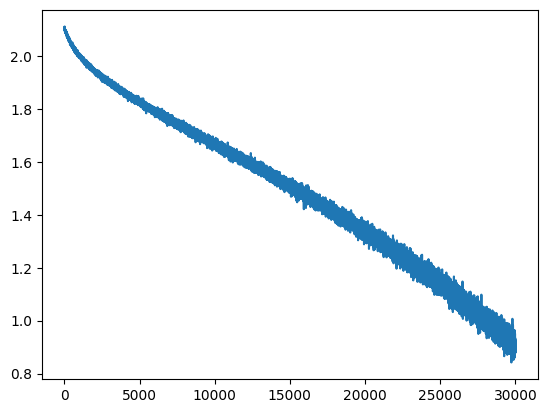

In [338]:
plt.plot(torch.arange(len(log_lossi)), log_lossi)

In [339]:
lossi_val = []
log_lossi_val = []

In [340]:
# Assicurati che Xtr, Ytr e i parametri siano sul device corretto
Xdev = check_and_move(Xtr, device)
Ydev = check_and_move(Ytr, device)

Moving tensor from cuda:0 to cuda
Moving tensor from cuda:0 to cuda


In [341]:
#@title valid - lr decay

for _ in range(1000):

  minibatch_portion = 32

  # minibatch construct
  ix = torch.randint(0, Xdev.shape[0], (minibatch_portion,))

  # forward pass
  emb = C[Xdev[ix]]
  h = torch.tanh(emb.view(-1, block_size * embedded_dims) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ydev[ix])

  # backward pass
  for p in params:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in params:
    p.data += -lr * p.grad

  # track stats
  lossi_val.append(loss.item())
  log_lossi_val.append(loss.log10().item())

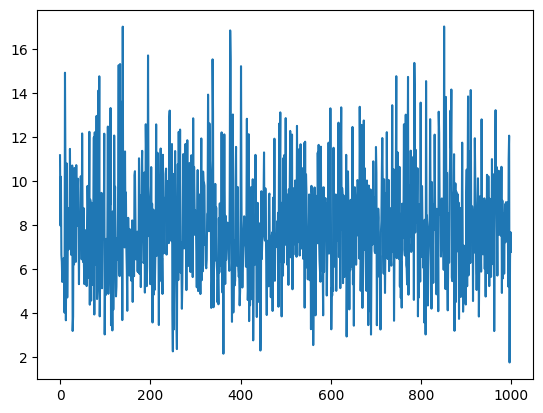

In [342]:
plt.plot(torch.arange(len(lossi_val)), lossi_val)

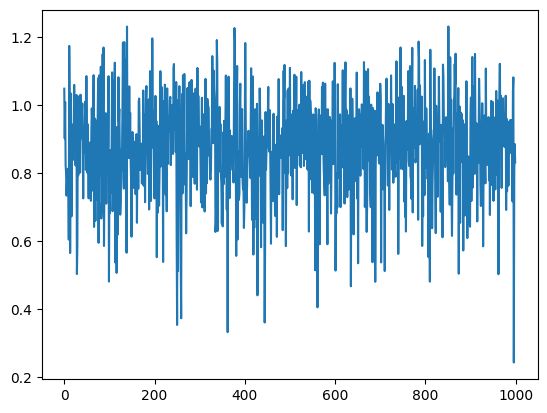

In [343]:
plt.plot(torch.arange(len(log_lossi_val)), log_lossi_val)

In [344]:
print(lossi[-1], lossi_val[-1])

8.265088081359863 6.783940315246582


Se la loss sul valid/dev set è simile al train set allora il modello underfitta. La train deve essere un po' meno. Se è troppo meno allora il modello overfitta. Se underfitta aumentare la dimensione della rete. Se overfitta diminuirla. Se aumento la dimensione della rete ho bisogno di più step per allenarla. Valutare anche la grandezza degli embedding (mettere gli embedding più grandi forse (?)).
Minibatches create a little bit of noise on the loss. Se è troppa aumentare la dimensione delle minibatches.

In [345]:
# plottare gli embedding e cercare di capire se dopo averli allenati hanno un senso
pass

# Sampling from the model

In [346]:
# sample from the model (generate a all new playlist)

g = torch.Generator(device=device).manual_seed(2147483647 + 10)

for _ in range(2):

  out = []
  context = [0] * block_size # initialize with all ...
  while True:
    emb = C[torch.tensor([context])] # (1,block_size,d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print('; '.join(itos[i] for i in out))

I Cry; The Spirit Of God; Running Out of Time; Only; Up; Get Back Up; Glass Flows; Root Beer Float; Hung the Moon (Live); Listen To The Music; Freightliner; Less Than Perfect; 911 / Mr. Lonely; Breakfast At Tiffany's; Single Girl; Así Vivo Yo; Never Be Like You - Wave Racer Remix; Un Sueño; Juke Box Hero; November Blue; I'm Out; Rosa Parks; Fuck That; Black & White - Jori Hulkkonen Dub; Reflection - Pop Version; May I Have This Dance (Remix) [feat. Chance the Rapper]; Hopelessly Devoted To You; You're the Best (Karate Kid); I Am Not A Whore; No Future; Truckin'; Back To Sleep REMIX; "Heroes" - Single Version, 2017 Remastered Version; Bad; In The Long Run; Perfect Pint (feat. Kendrick Lamar, Gucci Mane & Rae Sremmurd); Invitation; Forever With You; Love So Great - Live; Where's the Fun in Forever; Wind Song; Beggar in the Morning; Anastasia; The Boys Of Summer; Tell Your Heart to Beat Again; Somebody Somewhere; Shallow Love; Extreme Ways (Bourne's Legacy) - Original Version; Mr. Preside

In [347]:
# continuining a known playlist

chosen_playlist = playlists[0]   # farlo su Xte direttamente con gli indici volendo e fare metriche di valutazione
chosen_playlist

['Jesus Paid It All - Everything Glorious Album Version',
 'Come Thou Fount of Every Blessing',
 "How Deep the Father's Love for Us",
 'Beautiful Scandalous Night',
 'What Wondrous Love Is This',
 'For the Cross',
 'Man Of Sorrows - Live',
 'The Wonderful Cross - with Matt Redman',
 'O the Blood - Live']

In [348]:
context = [stoi[el] for el in chosen_playlist[:-1]]
itos[context[-1]]

'The Wonderful Cross - with Matt Redman'

In [349]:
context2 = [stoi[el] for el in chosen_playlist[:-1]][-1]
itos[context2]

'The Wonderful Cross - with Matt Redman'

In [350]:
g = torch.Generator(device=device).manual_seed(2147483647 + 10)

for _ in range(1):

  out = []
  context = [stoi[el] for el in chosen_playlist[:-1]]
  context = context[len(context)-block_size:]

  emb = C[torch.tensor([context])] # (1,block_size,d)
  h = torch.tanh(emb.view(1, -1) @ W1 + b1)
  logits = h @ W2 + b2
  probs = F.softmax(logits, dim=1)
  ix = torch.multinomial(probs, num_samples=1, generator=g).item()
  context = context[1:] + [ix]
  out.append(ix)
  if ix == 0:
    break

  print('; '.join(itos[i] for i in out))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 150x1024)